# WeatherPy
----

### Analysis
1. The weather gets warmer south of the equator as observed in the maximum temperature and latitude plot, where there is a distinct cluster of cities in the south of the equator having the highest maximum temperature and cities north of the equator have colder maximum temperatures.  
2. The windiest cities (wind speed greater than 15mph) were in the Northern Hemisphere.
3. There is no distinct trend or pattern between latitude and humidity as well as latitude vs cloudiness plots. There appears to be an even distribution of among the random cities selceted. 

---



In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pytemperature

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# Build partial query url
url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# Loop through the list of cities and perform a request for data on each
for count, city in enumerate(cities, 1):
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    print(f"Processing Record {count} | {city}")
    response = requests.get(query_url + city).json()
        
    # Try to access key(s) that do or do not exist and append to empty list
    try:
        City.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response ["sys"] ["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"] ["humidity"])
        Lat.append(response["coord"] ["lat"])
        Lng.append(response["coord"] ["lon"])
        Max_Temp.append(pytemperature.k2f(response["main"] ["temp_max"])) #convert kelvin to Fahrenheit
        Wind_Speed.append(response["wind"] ["speed"])
 # "Catching" the error lets the rest of our code execute       
    except KeyError:
           print("City not found. Skipping...")
   

print("------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------")

Processing Record 1 | udachnyy
Processing Record 2 | jamestown
Processing Record 3 | esfarayen
Processing Record 4 | khatanga
Processing Record 5 | hermanus
Processing Record 6 | lata
Processing Record 7 | ushuaia
Processing Record 8 | busselton
Processing Record 9 | punta arenas
Processing Record 10 | saint-philippe
Processing Record 11 | winslow
Processing Record 12 | cape town
Processing Record 13 | calama
Processing Record 14 | tsihombe
City not found. Skipping...
Processing Record 15 | talaya
Processing Record 16 | agirish
Processing Record 17 | mataura
Processing Record 18 | umm lajj
Processing Record 19 | rikitea
Processing Record 20 | longyearbyen
Processing Record 21 | barentsburg
City not found. Skipping...
Processing Record 22 | yellowknife
Processing Record 23 | new norfolk
Processing Record 24 | vaini
Processing Record 25 | kapaa
Processing Record 26 | adeje
Processing Record 27 | puerto ayora
Processing Record 28 | waihi beach
Processing Record 29 | tezu
Processing Record

Processing Record 234 | itarema
Processing Record 235 | ola
Processing Record 236 | poum
Processing Record 237 | dobsice
Processing Record 238 | oranjemund
Processing Record 239 | georgiyevskoye
Processing Record 240 | saint-denis
Processing Record 241 | tateyama
Processing Record 242 | nurota
Processing Record 243 | buin
Processing Record 244 | buena vista
Processing Record 245 | ayolas
Processing Record 246 | evensk
Processing Record 247 | mandalgovi
Processing Record 248 | clyde river
Processing Record 249 | yar-sale
Processing Record 250 | te anau
Processing Record 251 | dombarovskiy
Processing Record 252 | khonuu
City not found. Skipping...
Processing Record 253 | flinders
Processing Record 254 | pahrump
Processing Record 255 | namatanai
Processing Record 256 | tabas
Processing Record 257 | kahului
Processing Record 258 | saint george
Processing Record 259 | nsanje
Processing Record 260 | telimele
Processing Record 261 | oyama
Processing Record 262 | sosnovo-ozerskoye
Processing R

Processing Record 458 | grand gaube
Processing Record 459 | bridlington
Processing Record 460 | kirakira
Processing Record 461 | acapulco
Processing Record 462 | todos santos
Processing Record 463 | mao
Processing Record 464 | sitka
Processing Record 465 | asfi
City not found. Skipping...
Processing Record 466 | polyarnyy
Processing Record 467 | camocim
Processing Record 468 | mahibadhoo
Processing Record 469 | katsuura
Processing Record 470 | margate
Processing Record 471 | bowen
Processing Record 472 | ahipara
Processing Record 473 | port lincoln
Processing Record 474 | nizhnyaya tavda
Processing Record 475 | batagay
Processing Record 476 | mount isa
Processing Record 477 | bengkulu
City not found. Skipping...
Processing Record 478 | cap-aux-meules
Processing Record 479 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 480 | cozumel
City not found. Skipping...
Processing Record 481 | torbay
Processing Record 482 | novobirilyussy
Processing Record 483 | lakes entrance


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# export file to csv
df.to_csv("city_data.csv", index=False, header=True)

In [46]:
# create a data frame
df_dict = {"City": City, "Cloudiness": Cloudiness, "Country": Country, "Date": Date, "Humidity": Humidity,
        "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, "Wind Speed": Wind_Speed}
df = pd.DataFrame(df_dict) 
    
df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Udachnyy,44,RU,1553303049,64,66.42,112.40,2.13,3.41
1,Jamestown,92,AU,1553302762,69,-33.21,138.60,72.78,5.26
2,Esfarayen,0,IR,1553299200,92,37.08,57.51,30.18,0.86
3,Khatanga,12,RU,1553303050,53,71.98,102.47,-18.39,1.96
4,Hermanus,24,ZA,1553301924,89,-34.42,19.24,62.98,2.24
5,Lata,0,IN,1553303050,63,30.78,78.62,31.92,1.16
6,Ushuaia,90,AR,1553299200,93,-54.81,-68.31,46.38,4.10
7,Busselton,0,AU,1553302516,51,-33.64,115.35,60.98,7.36
8,Punta Arenas,75,CL,1553302992,76,-53.16,-70.91,51.78,5.10
9,Saint-Philippe,90,CA,1553303016,86,45.36,-73.48,37.97,7.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

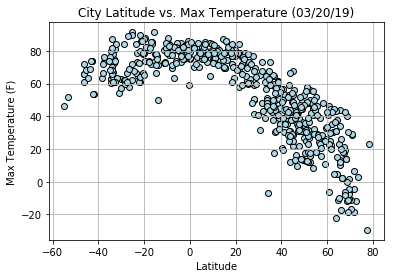

In [55]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Max Temp"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/20/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/MaxTemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

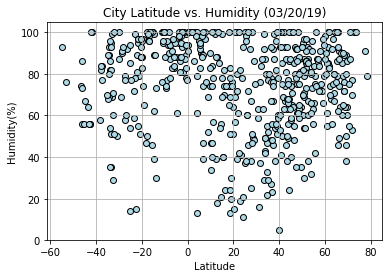

In [56]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Humidity"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/20/19)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

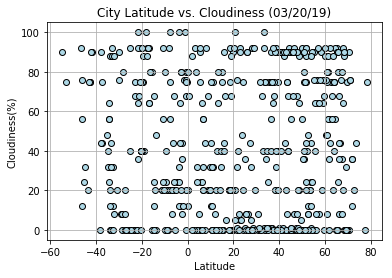

In [57]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/20/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

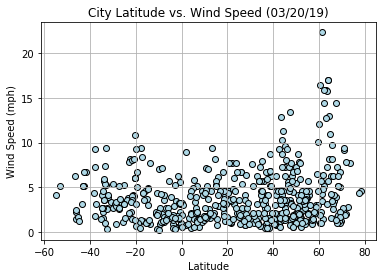

In [58]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/20/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/WindSpeedInWorldCities.png")

# Show plot
plt.show()